In [29]:
# Import the Dependencies
import pandas as pd
import numpy as np
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [30]:
# Load the Data
from google.colab import files
upload = files.upload()


Saving NFLX_Stock_Price.csv to NFLX_Stock_Price (1).csv


In [31]:
# Store data the data into a dataframe
df = pd.read_csv("NFLX_Stock_Price.csv")


In [32]:
# Print the first 6 rows

df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-2018,304.589996,318.450012,296.670013,317.380005,317.380005,15121500
1,02-11-2018,318.000000,321.880005,308.329987,309.100006,309.100006,13404600
2,05-11-2018,311.100006,317.529999,303.739990,315.440002,315.440002,10283000
3,06-11-2018,314.760010,320.220001,305.299988,310.839996,310.839996,9710400
4,07-11-2018,312.899994,328.559998,311.000000,327.500000,327.500000,13328300
5,08-11-2018,328.000000,332.049988,316.609985,317.920013,317.920013,11023900


In [9]:
# Get the number of  training days
df.shape

(1256, 7)

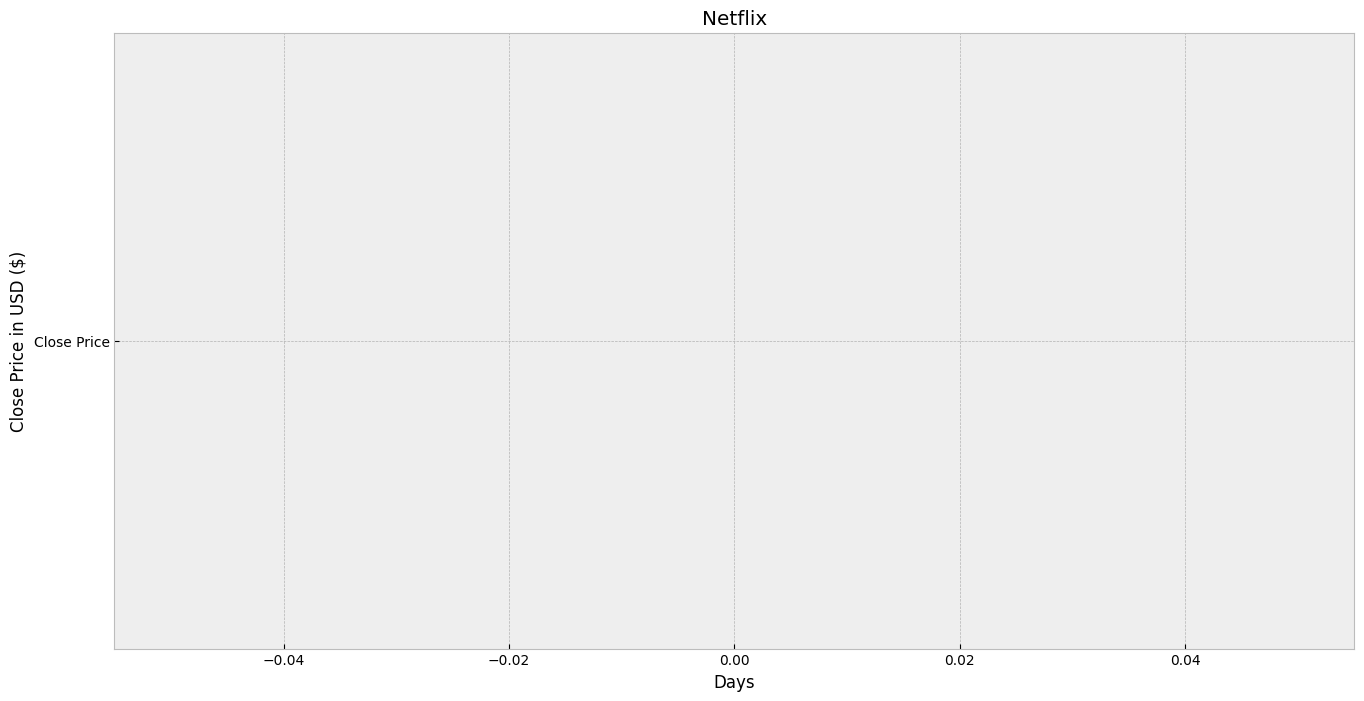

In [12]:
# Visualizing the close price data
plt.figure(figsize=(16,8))
plt.title(('Netflix'))
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot('Close Price')
plt.show()

In [18]:
# Get the close Price
df = df[['Close']]
df.head(4)

,Close
0,317.380005
1,309.100006
2,315.440002
3,310.839996


In [20]:
# Create a varuiable to predict the 'X"  days out into the future
future_days = 25
# Create a new column (targets)
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)
df.tail(4)

<ipython-input-20-e3b58f4b6b26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
1252,411.250000,NaN
1253,403.540009,NaN
1254,397.869995,NaN
1255,410.079987,NaN


In [23]:
# Create the feature dataset (X) and convert it to a numpy array and remove the last 'X'
X = np.array(df.drop(['Prediction'], axis = 1))[:-future_days]
print(X)

[[317.380005]
 [309.100006]
 [315.440002]
 ...
 [384.149994]
 [379.809998]
 [384.799988]]


In [25]:
# Create the target dataset  (Y) convert it into a np.array and get all the target values
Y = np.array(df['Prediction'][:-future_days])
print(Y)

[269.700012 265.320007 274.880005 ... 403.540009 397.869995 410.079987]


In [26]:
# Split the data into 75% training data and 25% testing data
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size =0.25)

In [34]:
# Create the nodels
# Create the Decision tree  regression model
tree = DecisionTreeRegressor().fit(X_train, Y_train)
#Create the linear regression model
lr = LinearRegression().fit(X_train, Y_train)


In [42]:
# Get the last X rows of the feature data set
X_future = df[['Close']].iloc[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future
X_future



array([[408.290009],
       [413.170013],
       [427.549988],
       [406.929993],
       [416.029999],
       [418.059998],
       [429.98999 ],
       [434.670013],
       [433.679993],
       [439.880005],
       [448.679993],
       [445.76001 ],
       [443.140015],
       [442.799988],
       [445.359985],
       [434.690002],
       [412.23999 ],
       [400.48999 ],
       [396.940002],
       [394.399994],
       [396.200012],
       [386.299988],
       [384.149994],
       [379.809998],
       [384.799988]])

In [44]:
# Show the modela tree prediction
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()
# Show the model linear regression model
lr_prediction =lr.predict(X_future)
print(lr_prediction)
print()

[379.25      405.6349945 416.029999  377.600006  438.619995  376.75
 443.140015  372.589996  381.51001   385.950012  373.320007  365.929993
 361.200012  361.200012  365.929993  372.589996  346.190002  401.769989
 400.959991  406.839996  413.730011  411.25      403.540009  397.869995
 410.079987 ]

[407.93212654 412.21033372 424.81698574 406.73982625 414.71762934
 416.49729106 426.95608933 431.05897695 430.19104515 435.62647837
 443.34126136 440.78136751 438.48446746 438.18637222 440.43067316
 431.07650093 411.39500015 401.09399746 397.98179014 395.75501318
 397.33305491 388.65389117 386.76903211 382.96423973 387.33886955]



<ipython-input-48-34fa502df842>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


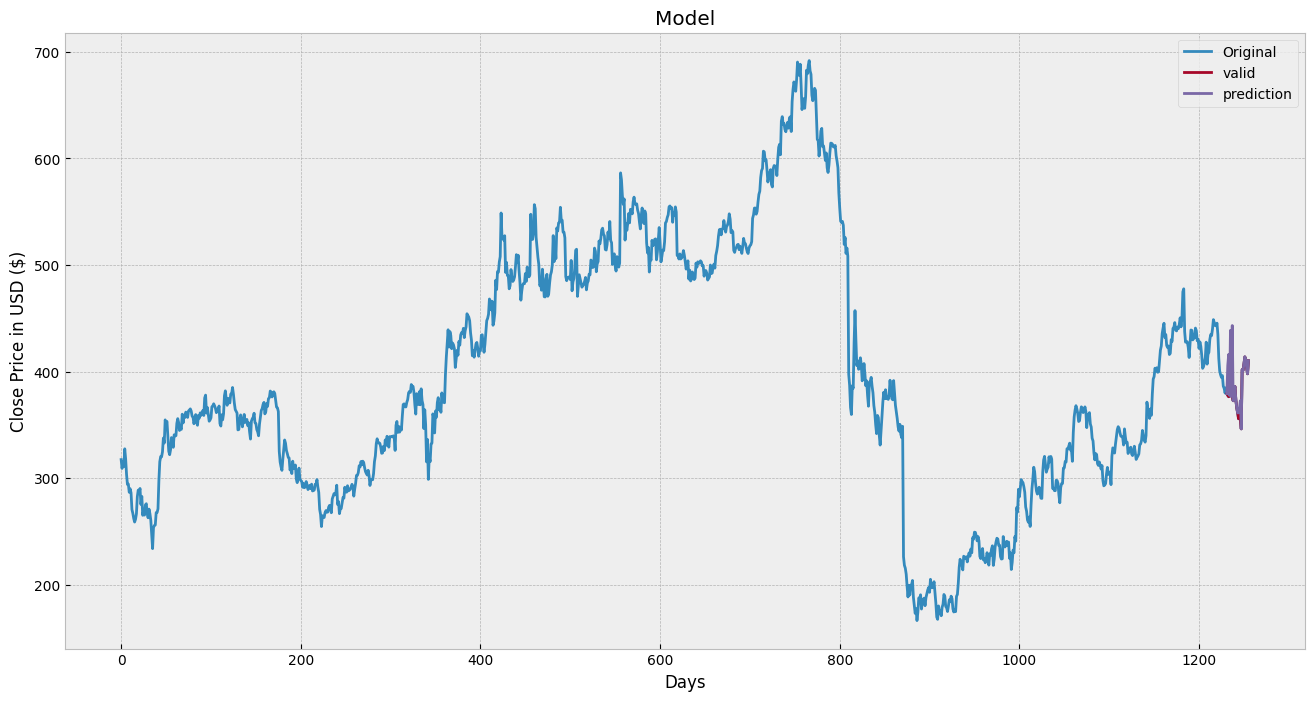

In [48]:
# Visualize the data
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','valid', 'prediction'])
plt.show()

<ipython-input-50-94dd616af78c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


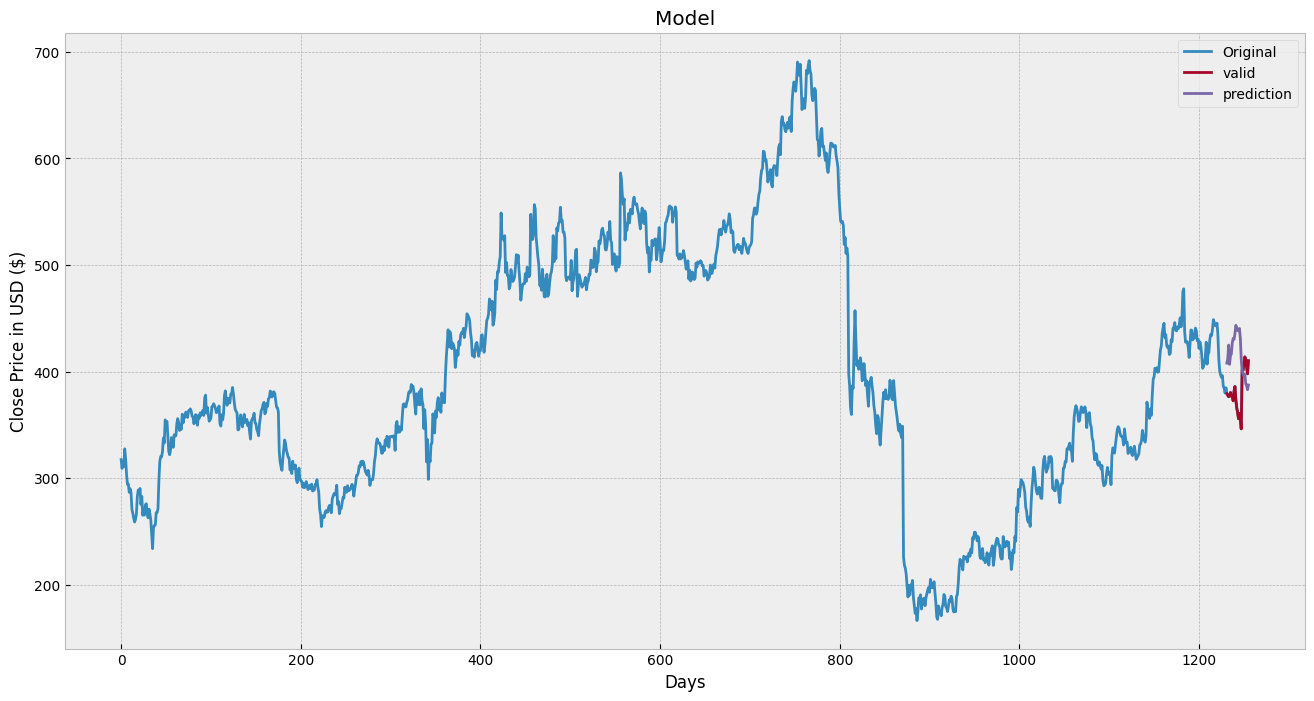

In [50]:
# visualize the data
prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','valid', 'prediction'])
plt.show()
